<a href="https://colab.research.google.com/github/jakubtwalczak/Muller_Guido_Introduction_to_ML/blob/main/Rozdzia%C5%82_3_Uczenie_nienadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przetwarzanie wstępne i skalowanie.

Przetwarzanie wstępne i skalowanie są powszechnie używane w połączeniu z metodami uczenia nadzorowanego. Autorzy książki wyróżniają je wśród metod nienadzorowanego uczenia, bowiem metody skalowania nie wykorzystują informacji nadzorowanych, co sprawia, że są nienadzorowane.

Algorytmy takie, jak sieci neuronowe czy SVM, są bardzo wrażliwe na skalowanie danych, toteż stosuje się je, aby reprezentacja danych była dla tych algorytmów bardziej odpowiednia.

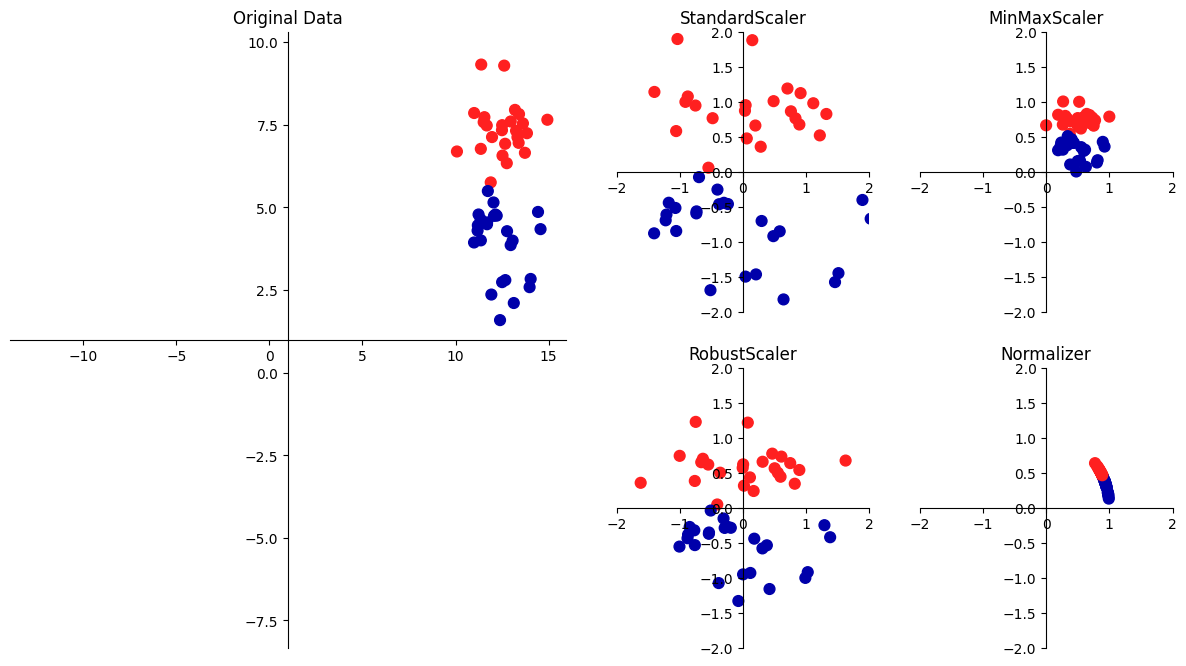

In [1]:
import mglearn

mglearn.plots.plot_scaling()

Powyżej przedstawiono syntetyczne dane dla klasyfikacji wieloklasowej z dwoma cechami: pierwsza (oś X) w przedziale 10 - 15, druga (oś Y) - 1 - 9. Dalej wykreślone są cztery różne sposoby przekształceń:
- **StandardScaler** - zapewnia, że dla każdej cechy średnia ma wartość 0, a odchylenie standardowe 1. Przekształca dane, dzieląc różnicę wartości cechy dla próbki i średniej dla cechy przez odchylenie standardowe. Skalowanie to nie zapewnia dla cechy wartości minimalnej i maksymalnej.
- **RobustScaler** - przekształca dane, dzieląc różnicę wartości cechy dla próbki i mediany dla cechy przez przedział między kwartylami (IQR; różnica między 1. i 3. kwartylem). Zapewnia tym samym medianę równą 0 i IQR równą 1 oraz odporność na wszelkie punkty odstające (outliery).
- **MinMaxScaler** - redukuje wszystkie wartości do przedziału 0 - 1. Różnicę między wartością cechy dla próbki i wartością minimalną cechy dla próbki dzieli przez różnicę między maksimum a minimum.
- **Normalizer** - skaluje każdy punkt danych w ten sposób, że wektor cech ma długość euklidesową 1 (każdy wiersz skalowany jest tak, żeby suma kwadratów jego cechy była równa 1). Dotyczy to całych obserwacji, nie tylko jednego punktu dot. cechy.

Zastosujmy zatem poznane metody do konkretnego zbioru danych - w tym wypadku ponownie **Cancer**. Skalery są zwykle używane przed zastosowaniem algorytmu uczenia nadzorowanego. W tym wypadku zastosujemy SVC w połączeniu z instancją klasy MinMaxScaler do preprocessingu, oczywiście po standardowej procedurze wstępnej w postaci załadowania danych i wydzielenia danych testowych.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np
np.set_printoptions(formatter={'float': '{:0.2f}'.format})

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


Ładujemy instancję skalera do danych uczących. Metoda fit oblicza minimalną i maksymalną każdej cechy danych uczących.

In [3]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

Aby jednak zastosować transformację do danych, używamy metody transform skalera.

In [4]:
X_train_scaled = scaler.transform(X_train)
print(f"Shape after scaling: {X_train_scaled.shape}")
print(f"Min value of each feature before scaling: {np.round(X_train.min(axis=0),1 )}")
print(f"Max value of each feature before scaling: {np.round(X_train.max(axis=0), 1)}")
print(f"Min value of each feature after scaling: {X_train_scaled.min(axis=0)}")
print(f"Max value of each feature after scaling: {X_train_scaled.max(axis=0)}")

Shape after scaling: (426, 30)
Min value of each feature before scaling: [7.00 9.70 43.80 143.50 0.10 0.00 0.00 0.00 0.10 0.10 0.10 0.40 0.80 6.80
 0.00 0.00 0.00 0.00 0.00 0.00 7.90 12.00 50.40 185.20 0.10 0.00 0.00 0.00
 0.20 0.10]
Max value of each feature before scaling: [28.10 39.30 188.50 2501.00 0.20 0.30 0.40 0.20 0.30 0.10 2.90 4.90 22.00
 542.20 0.00 0.10 0.40 0.10 0.10 0.00 36.00 49.50 251.20 4254.00 0.20 0.90
 1.20 0.30 0.60 0.10]
Min value of each feature after scaling: [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00]
Max value of each feature after scaling: [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00]


Przekształcone dane nie różnią się kształtem od oryginalnych. Zgodnie z założeniem wszystkie cechy mają jednak wartości od 0 do 1.

Aby zastosować algorytm SVC do danych przeskalowanych, musimy również przeskalować dane testowe. Do nich stosujemy jednak wyłącznie metodę transform.

In [5]:
X_test_scaled = scaler.transform(X_test)
print(f"Per-feature minimum after scaling: {X_test_scaled.min(axis=0)}")
print(f"Per-feature maximum after scaling: {X_test_scaled.max(axis=0)}")

Per-feature minimum after scaling: [0.03 0.02 0.03 0.01 0.14 0.04 0.00 0.00 0.15 -0.01 -0.00 0.01 0.00 0.00
 0.04 0.01 0.00 0.00 -0.03 0.01 0.03 0.06 0.02 0.01 0.11 0.03 0.00 0.00
 -0.00 -0.00]
Per-feature maximum after scaling: [0.96 0.82 0.96 0.89 0.81 1.22 0.88 0.93 0.93 1.04 0.43 0.50 0.44 0.28
 0.49 0.74 0.77 0.63 1.34 0.39 0.90 0.79 0.85 0.74 0.92 1.13 1.07 0.92
 1.21 1.63]


Po przeskalowaniu minima nie zawsze są równe 0, a maksima równe 1. Wyjaśnienie tego jest proste - skaler stosuje tę samą transformację dla zbioru testowego, co dla uczącego; zawsze odejmuje minimum zbioru uczącego i dzieli przez zakres zbioru uczącego, który przeważnie jest różny od testowego.

Poprawna transformacja powinna być przeprowadzona na danych uczących i treningowych po dopasowaniu wyłącznie do danych uczących. A jak wyglądałoby to, gdybyśmy użyli dla zbioru testowego minimum i zakresu tegoż zbioru?

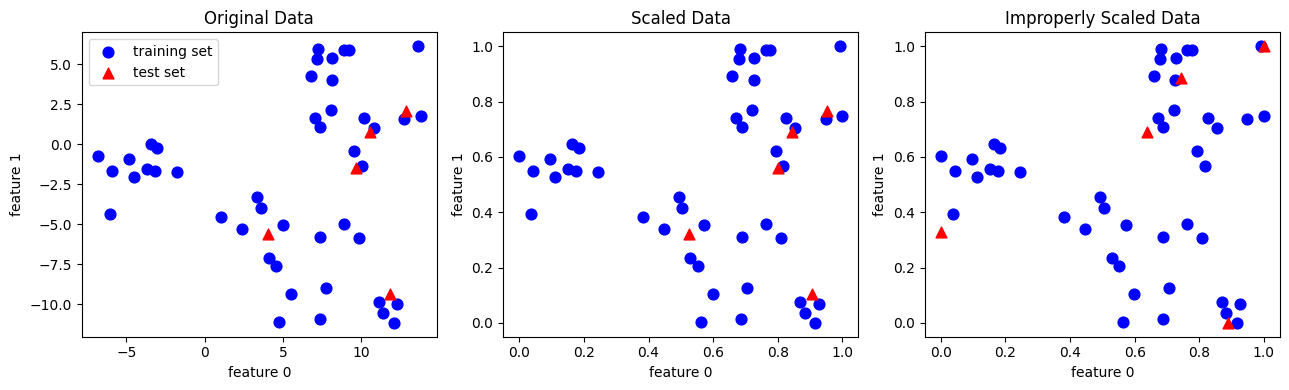

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                color='blue', label="training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                color='red', label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scaling the data with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualization of the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color='blue', label="training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                color='red', label="test set", s=60)
axes[1].set_title("Scaled Data")

# Data scaled wrongly (don't do this!)
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualization of the badly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color='blue', label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
                color='red', label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
fig.tight_layout()

Na wszystkich wykres niebieskie kropki oznaczają dane treningowe, czerwone trójkąty - testowe. Pierwszy wykres z lewej przedstawia dane oryginalne, środkowy - przeskalowane MinMaxScalerem w sposób prawidłowy, wykres najbardziej na prawo - przeskalowane błędne. Zbiór danych na pierwszych dwóch wykresach wygląda identycznie, różne są tylko znaczniki na osiach; po przeskalowaniu cechy mieszczą się w przedziale 0 - 1.

Trzeci wykres pokazuje, co by się stało, gdybyśmy przeskalowali osobno dane uczące i testowe. Dane testowe też mieszczą się w przedziale 0 - 1, jednak punkty przesunęły się nieadekwatnie do zbioru uczącego z powodu innego skalowania. Taki sposób stanowi niedopuszczalną, arbitralną ingerencję w układ danych!

Ważne - wszystkie modele skalujące dane zawierają metodę fit_transform, która pozwala na dopasowanie i transformację danych jedną metodą (podobnie jak modele nadzorowane zawierają metodę fit_predict). Metoda ta niekoniecznie jest bardziej wydajna, ale jej użycie jest uznawane za dobrą praktykę.

Sprawdźmy, jak skalowanie wpływa na naukę SVC. Najpierw dopasujmy model do oryginalnych danych:

In [7]:
svm = SVC(C=100)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
svm.fit(X_train, y_train)
print(f"Test accuracy: {svm.score(X_test, y_test):.2f}")

Test accuracy: 0.94


Następnie przeskalujmy dane przy pomocy MinMaxScalera, a potem ponownie wytrenujmy model:

In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(f"Test accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Test accuracy: 0.97


Efekt skalowania danych okazał się dość znaczący. Warto znać metody skalowania z Scikit-learn i je stosować, co jest znacznie lepszą praktyką niż samodzielne obliczenia (choć nie należą one do najbardziej skomplikowanych).

Dzięki temu, że wszystkie klasy skalowania mają ten sam interfejs, bardzo łatwo zastąpić jeden algorytm przetwarzania drugim, zmieniając nazwę używanej klasy:

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print(f"Test accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Test accuracy: 0.97


# Redukcja wymiarowości, wyodrębianie cech, uczenie wielorakie.

## Analiza głównych składowych (PCA).

PCA (ang. Principal Component Analysis) to metoda polegająca na takim obróceniu zbioru danych, że obracane cechy są statystycznie nieskorelowane. W zależności od tego, jak istotne są one dla objaśnienia danych, następuje potem etap wyboru podzbioru nowych cech.

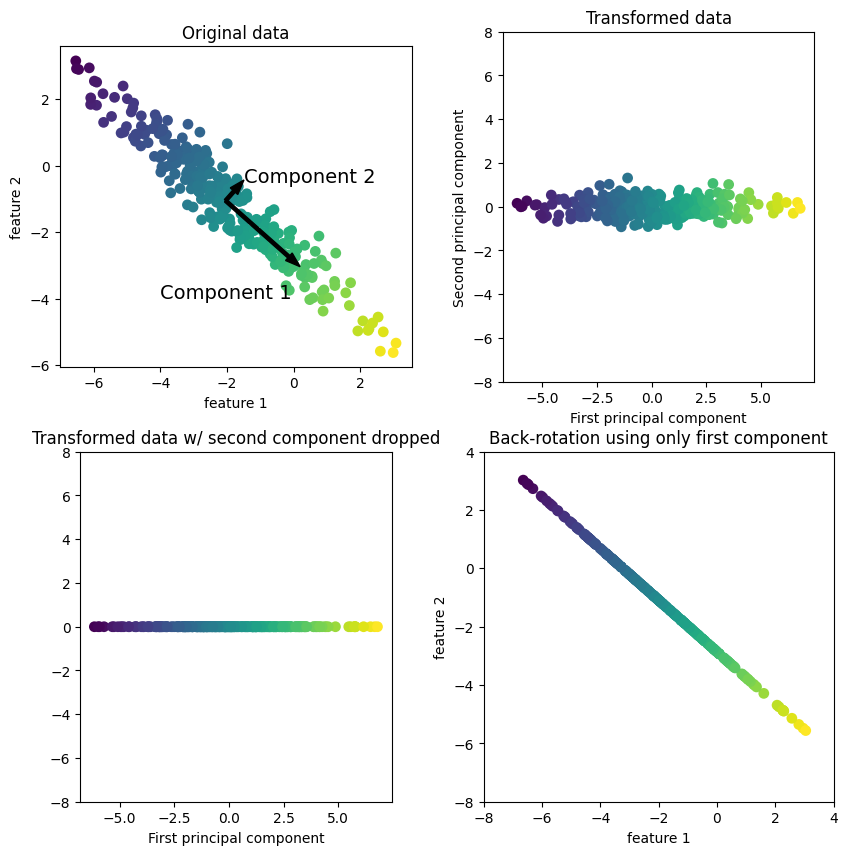

In [10]:
mglearn.plots.plot_pca_illustration()

Powyższe wykresy obrazują wpływ PCA na syntetyczne dane o dwóch wymiarach. Pierwszy wykres przedstawia dane oryginalne, pokolorowane w sposób umożliwiający ich rozróżnienie. Algorytm najpierw odnajduje kierunek maksymalnej wariancji (Component 1) - który to jest kierunkiem lub wektorem danych, w którym cechy są najbardziej skorelowane. Następnie odnajduje kierunek zawierający najwięcej informacji (Component 2), prostopadły do pierwszego kierunku. Kierunki odnalezione w ten sposób nazywamy głównymi składowymi, ponieważ są głównymi kierunkami wariancji danych. Należy pamiętać, że w dwóch wymiarach istnieje tylko jedna możliwa orientacja pod kątem prostym do pierwszego kierunku, ale w wyższych wymiarach kierunków jest już ich więcej. Istnieje tyle podstawowych elementów, ile oryginalnych.

Wykres w górnym prawym rogu przedstawia te same dane, ale obrócone tak, że pierwszy główny składnik jest wyrównany względem osi X, a drugi względem osi Y. Przed rotacją od danych odejmowano średnią, tak że przekształcone dane znajdują się w pobliżu zera. W odwróconej reprezentacji dwie osie są nieskorelowane - korelacja wynosi 0, z wyjątkiem przekątnej.

PCA można użyć do redukcji wymiarowości, zachowując jedynie niektóre z głównych komponentów (np. tylko pierwszego głównego składnika, jak widać na wykresie w lewym dolnym rogu). Zwrócić trzeba uwagę, że zamiast zachować tylko jedną z cech, odnaleziony został najciekawszy kierunek i to właśnie on, a nie oryginalna cecha, jest pierwszą główną składową. Można dodać średnią z powrotem do danych (ostatni wykres). Punkty znajdują się w pierwotnej przestrzeni, ale zachowane zostały tylko informacje zawarte w pierwszej głównej składowej. Ta transformacja bywa przydatna do usuwania efektów szumu w danych lub pokazania, która część informacji jest zachowywana.

Jednym z najczęstszych zastosowań PCA jest wizualizacja zbiorów danych o wielu wymiarach. Dla zbiorów posiadających, tak jak Cancer, 30 cech objaśniających, trudno stworzyć wykres typu pairplot. Prostszą metodą jest stworzenie histogramów każdej cechy dla obu klas.

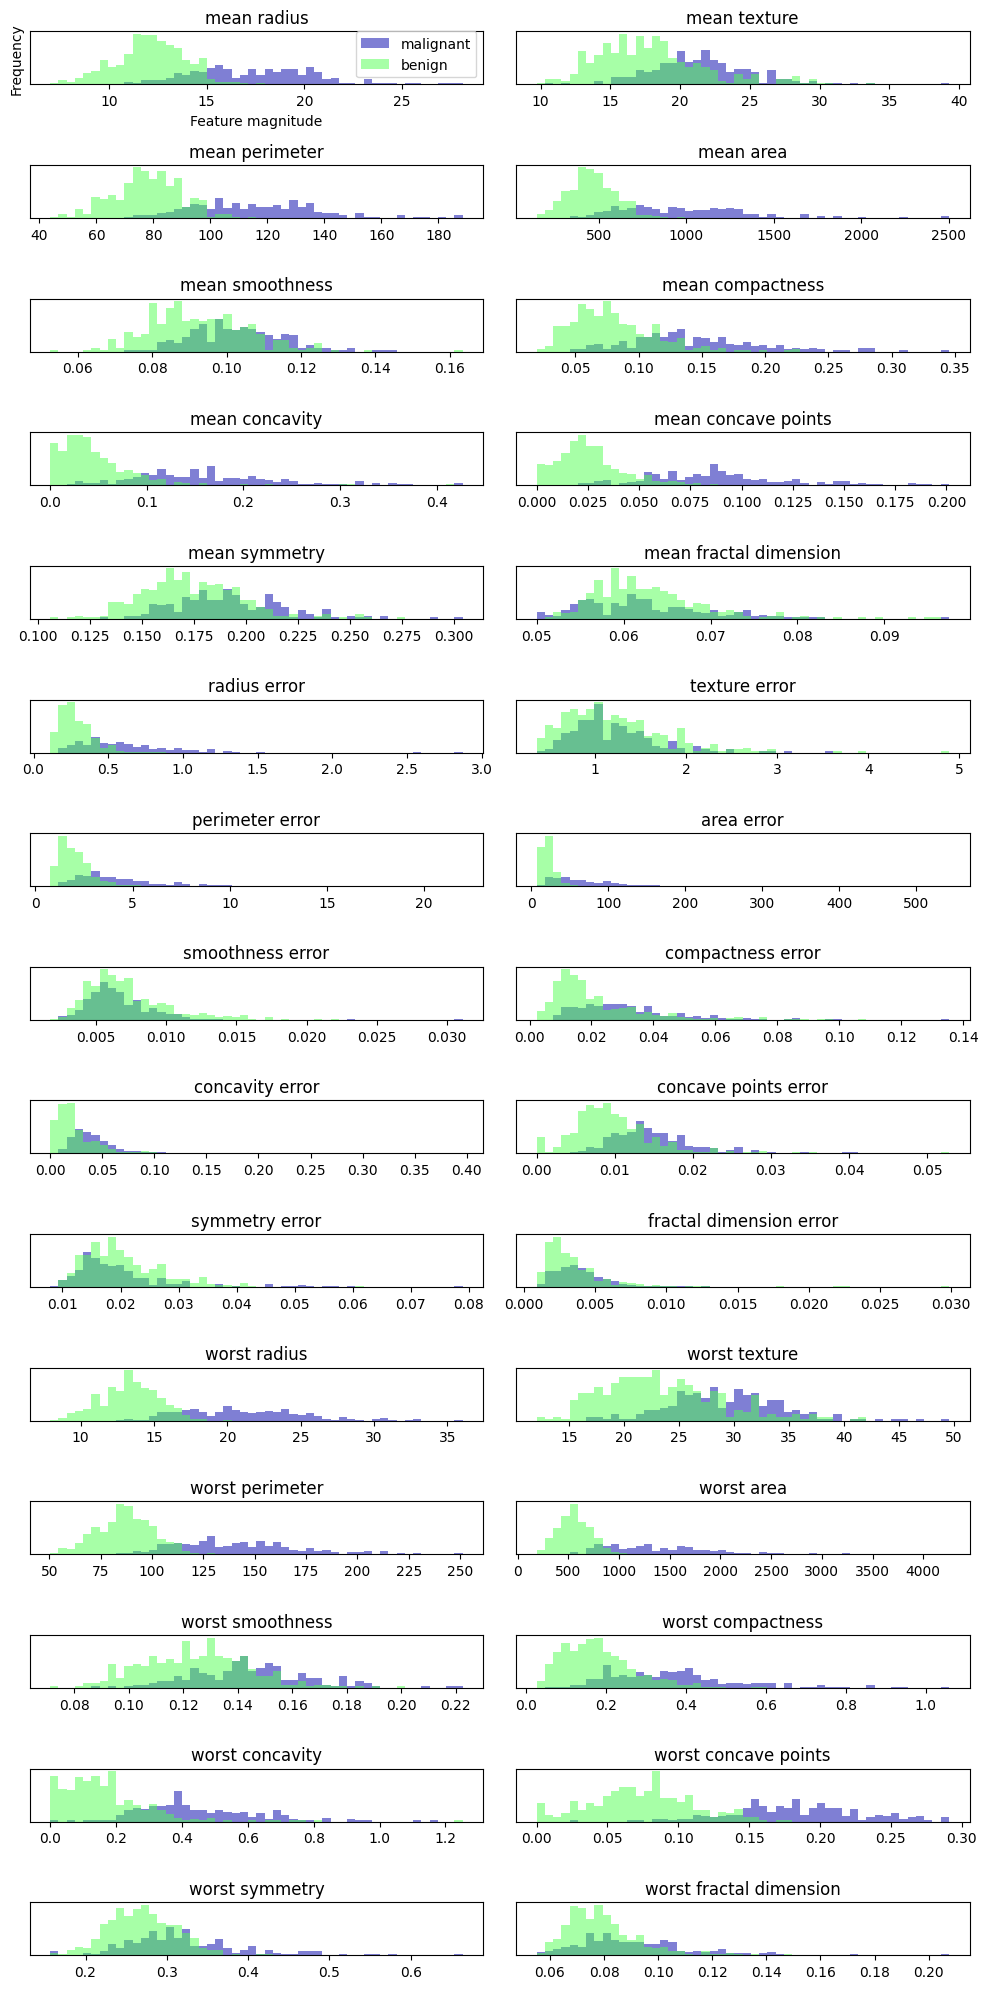

In [11]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Tworząc histogram, zliczamy, jak często w określonym przedziale (bin) pojawia się punkt danych z cechą i do jakiej klasy należy. Każdy wykres nakłada na siebie dwa histogramy, daje nam wyobrażenie nt. rozmieszczenia cech w obu klasach i pozwala wysnuć założenia, które cechy lepiej odróżniają próbki łagodne i złośliwe. Wykres ten nie daje jednak wyobrażenia nt. interakcji między cechami i związku tychże z klasami. Korzystając z PCA, możemy uchwycić główne interakcje i uzyskać pełniejszy obraz zmiennych.

Na początku jednak skalujemy dane, aby każda cecha miała wariancję jednostek.

In [12]:
cancer = load_breast_cancer()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

Aby zastosować PCA, tworzymy instancję obiektu, wywołujemy metodę fit, aby znaleźć główne komponenty, a następnie metodę transform dla redukcji rotacji i wymiarowości. Domyślnie PCA tylko obraca i przesuwa dane, ale zachowuje wszystkie główne komponenty - dlatego, aby zmniejszyć wymiarowość danych, musimy określić, ile głównych komponentów chcemy zachować.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(f"Shape before PCA: {X_scaled.shape}")
print(f"Shape after PCA: {X_pca.shape}")

Shape before PCA: (569, 30)
Shape after PCA: (569, 2)


Teraz możemy zwizualizować dwa pierwsze główne komponenty.

Text(0, 0.5, 'second principal component')

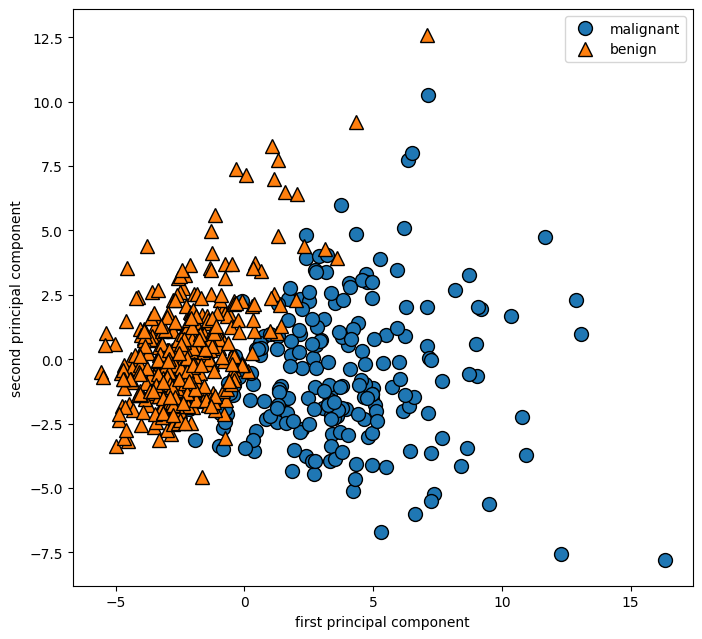

In [14]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["malignant", "benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("first principal component")
plt.ylabel("second principal component")

PCA, jako metoda nienadzorowana, nie używa żadnych informacji o klasach, a działa wyłącznie na korelacjach w danych. Na powyższym wykresie widać, że w tej dwuwymiarowej przestrzeni klasy zdają się rozdzielać naprawdę dobrze, więc nawet klasyfikator liniowy mógłby się tu nieźle sprawdzić. Widzimy też, że guzy złośliwe są bardziej rozproszone niż łagodne (co potwierdza obserwację histogramów).

Wada PCA - często dwie osie wykresu nie są łatwe do interpretacji, bowiem główne komponenty odpowiadają kierunkom w oryginalnych danych i stanowią kombinacje oryginalnych cech, niejednokrotnie bardzo złożone. Same główne komponenty są przechowywane w atrybucie components_ obiektu PCA.

In [15]:
print(f"pca.components_.shape: {pca.components_.shape}")

pca.components_.shape: (2, 30)


Każdy wiersz atrybutu odpowiada głównemu składnikowi, a wiersze posortowane są wg ważności. Kolumny odpowiadają oryginalnemu zestawowi cech.

In [16]:
print(f"pca.components_: {pca.components_}")

pca.components_: [[0.22 0.10 0.23 0.22 0.14 0.24 0.26 0.26 0.14 0.06 0.21 0.02 0.21 0.20
  0.01 0.17 0.15 0.18 0.04 0.10 0.23 0.10 0.24 0.22 0.13 0.21 0.23 0.25
  0.12 0.13]
 [-0.23 -0.06 -0.22 -0.23 0.19 0.15 0.06 -0.03 0.19 0.37 -0.11 0.09 -0.09
  -0.15 0.20 0.23 0.20 0.13 0.18 0.28 -0.22 -0.05 -0.20 -0.22 0.17 0.14
  0.10 -0.01 0.14 0.28]]


Współczynniki możemy zwizualizować za pomocą heatmapy, co może pomóc w łatwiejszym zrozumieniu mechanizmu.

Text(0, 0.5, 'Principal components')

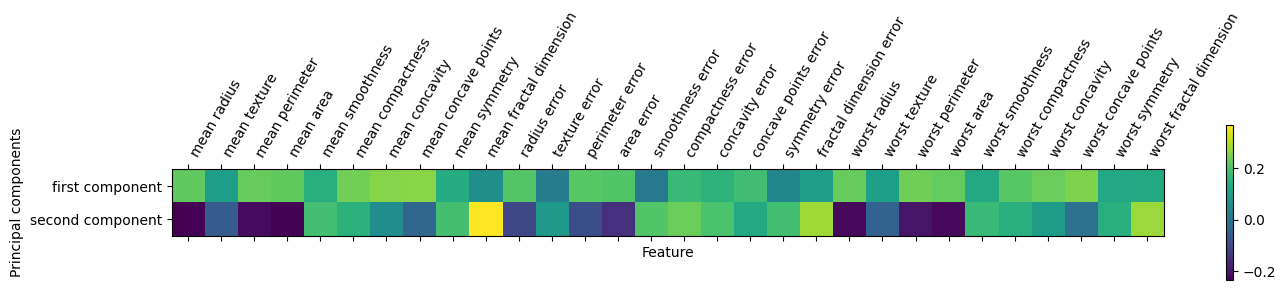

In [17]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

W przypadku pierwszego komponentu wszystkie elementy mają ten sam, dodatni znak korelacji. Ponieważ jeden pomiar jest wysoki, pozostałe również będą wysokie. W przypadku składowej drugiej znaki są mieszane. Oba komponenty obejmują wszystkie 30 cech. To mieszanie cech sprawia, że objaśnienie algorytmu jest tak trudne.

Innym zastosowaniem PCA może być wyodrębnianie cech. Ideą tego procesu jest znalezienie takiej reprezentacji, która nadaje się do interpretacji lepiej niż surowa.

Bardzo dobrym przykładem takiego zastosowania jest praca z obrazami. Składają się one z pikseli, przechowywanych jako odcienie czerwonego, zielonego i niebieskiego (przestrzeń RGB). Obiekty na obrazach składają się na ogół z wielu tysięcy, a nawet milionów pikseli i tylko razem są w stanie coś przedstawić.

Załadujmy zbiór danych Labeled Faces In The Wild. Zawiera on twarze znanych postaci świata kultury, sporty czy polityki z początku XXI w. Użyjemy zmniejszonych wersji tych obrazów w odcieniach szarości, aby było je łatwiej przetworzyć.

image_shape: (87, 65)


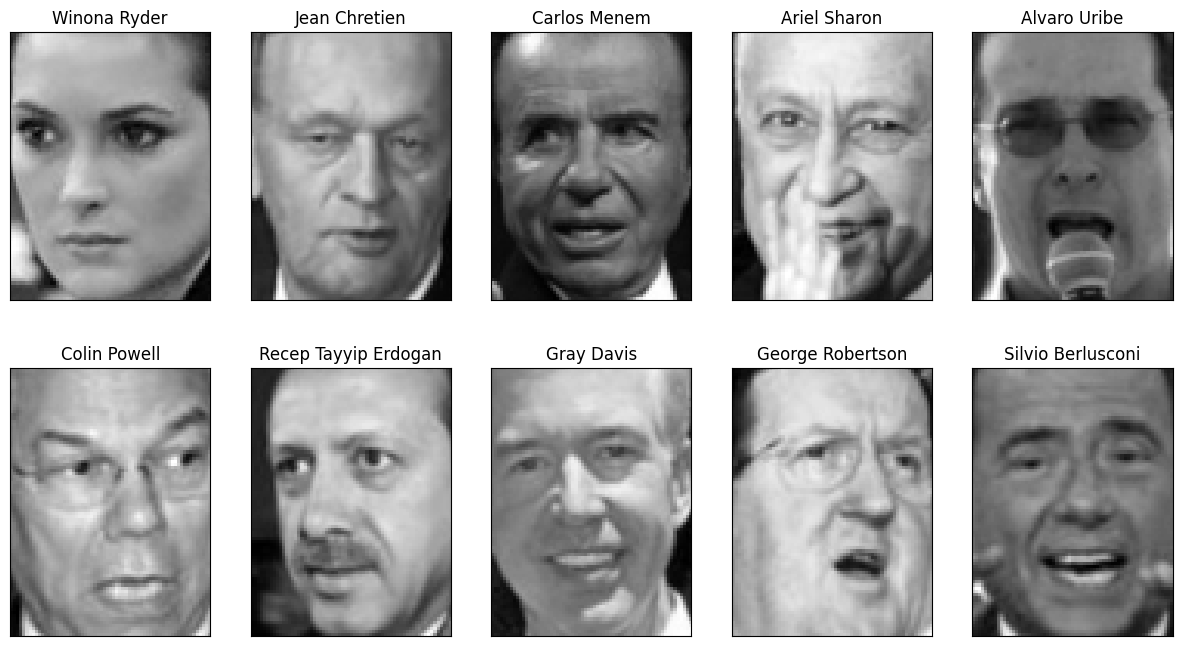

In [18]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(f"image_shape: {image_shape}")
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

Zbiór zawiera 3023 obrazy o rozmiarach 87x65 pikseli. Przedstawione są na nim 62 osoby.

In [19]:
print(f"people.images.shape: {people.images.shape}")
print(f"Number of classes: {len(people.target_names)}")

people.images.shape: (3023, 87, 65)
Number of classes: 62


Problem - dane zawierają niewspółmiernie dużo zdjęć pojedynczych osób (George'a W. Busha i Colina Powella) w stosunku do całości zbioru.

In [20]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f"{i+1:2}: {name} ({count})")
    if (i + 1) % 3 == 0:
      print()

 1: Alejandro Toledo (39)
 2: Alvaro Uribe (35)
 3: Amelie Mauresmo (21)

 4: Andre Agassi (36)
 5: Angelina Jolie (20)
 6: Ariel Sharon (77)

 7: Arnold Schwarzenegger (42)
 8: Atal Bihari Vajpayee (24)
 9: Bill Clinton (29)

10: Carlos Menem (21)
11: Colin Powell (236)
12: David Beckham (31)

13: Donald Rumsfeld (121)
14: George Robertson (22)
15: George W Bush (530)

16: Gerhard Schroeder (109)
17: Gloria Macapagal Arroyo (44)
18: Gray Davis (26)

19: Guillermo Coria (30)
20: Hamid Karzai (22)
21: Hans Blix (39)

22: Hugo Chavez (71)
23: Igor Ivanov (20)
24: Jack Straw (28)

25: Jacques Chirac (52)
26: Jean Chretien (55)
27: Jennifer Aniston (21)

28: Jennifer Capriati (42)
29: Jennifer Lopez (21)
30: Jeremy Greenstock (24)

31: Jiang Zemin (20)
32: John Ashcroft (53)
33: John Negroponte (31)

34: Jose Maria Aznar (23)
35: Juan Carlos Ferrero (28)
36: Junichiro Koizumi (60)

37: Kofi Annan (32)
38: Laura Bush (41)
39: Lindsay Davenport (22)

40: Lleyton Hewitt (41)
41: Luiz Inacio L

Z tego powodu weźmiemy tylko do 50 zdjęć każdej osoby, aby wyodrębnianie cech nie było przytłoczone podobieństwem do 43. prezydenta USA.

In [21]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

W rozpoznawaniu twarzy głównym pytaniem jest, czy twarz wcześniej nieznana należy do osoby znanej w zbiorze danych. Jednym ze sposobów rozwiązania tego problemu byłaby budowa takiego klasyfikatora, w którym każda osoba jest reprezentowana przez oddzielną klasę. Jednakże na ogół w zbiorach danych zdjęć tej samej osoby (więc i przykładów danych uczących) jest niewiele, więc trudno jest trenować modele klasyfikacji. Ponadto chcemy mieć zwykle możliwość łatwego dodawania nowych osób bez konieczności szkolenia modelu ponownie.

Rozwiązaniem prostym jest użycie klasyfikatora k-najbliższych sąsiadów z jednym sąsiadem. Wyszukwać on miałby obraz najbardziej podobny do klasyfikowanej twarzy.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"Test set score of 1-nn: {knn.score(X_test, y_test):.3f}")

Test set score of 1-nn: 0.215


Dokładność na poziomie 0,215 jest lepsza niż wynik modelu losowego (1/62 = ok. 0,015), ale trudno ten wynik uznać za satysfakcjonujący.

Obliczanie odległości w oryginalnej przestrzeni pikseli nie jest najlepszym sposobem mierzenia podobieństwa między twarzami. W ten sposób porównujemy tylko wartość w skali szarości każdej pojedynczego piksela, a dla takiej reprezentacji trudno jest uchwycić rysy twarzy czy zinterpretować jej wyraz. Przesunięcie twarzy o 1 piksel odpowiada drastycznej zmianie z całkowicie inną reprezentacją.

Włączmy opcję "wybielania" PCA (parametr whiten), która przeskalowuje główne komponenty do tej samej skali, co jest tym samym, co użycie klasy StandardScaler po transformacji.

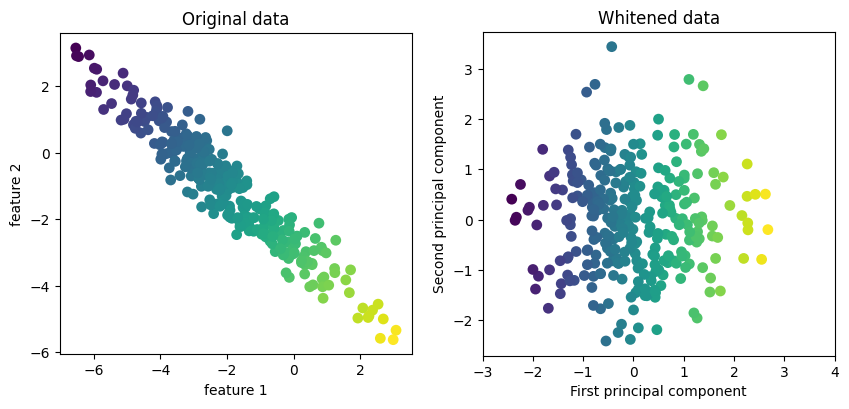

In [23]:
mglearn.plots.plot_pca_whitening()

Dopasowujemy obiekt PCA do danych uczących, wyodrębniając 100 pierwszych głównych komponentów, przekształcamy dane treningowe i testowe.

In [24]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"X_train_pca.shape: {X_train_pca.shape}")

X_train_pca.shape: (1547, 100)


Nowe dane zawierają 100 cech 100 pierwszych głównych składników. Nowej reprezentacji możemy użyć do klasyfikacji przy użyciu jednego najbliższego sąsiada.

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(f"Test set accuracy: {knn.score(X_test_pca, y_test):.3f}")

Test set accuracy: 0.297


Dokładność wzrosła do ok. 0,3. Główne komponenty mogą więc, zgodnie z założeniem, zapewnić lepszą reprezentację danych.

W przypadku obrazów możemy łatwiej zwizualizować główne komponenty.

In [26]:
print(f"pca.components_.shape: {pca.components_.shape}")

pca.components_.shape: (100, 5655)


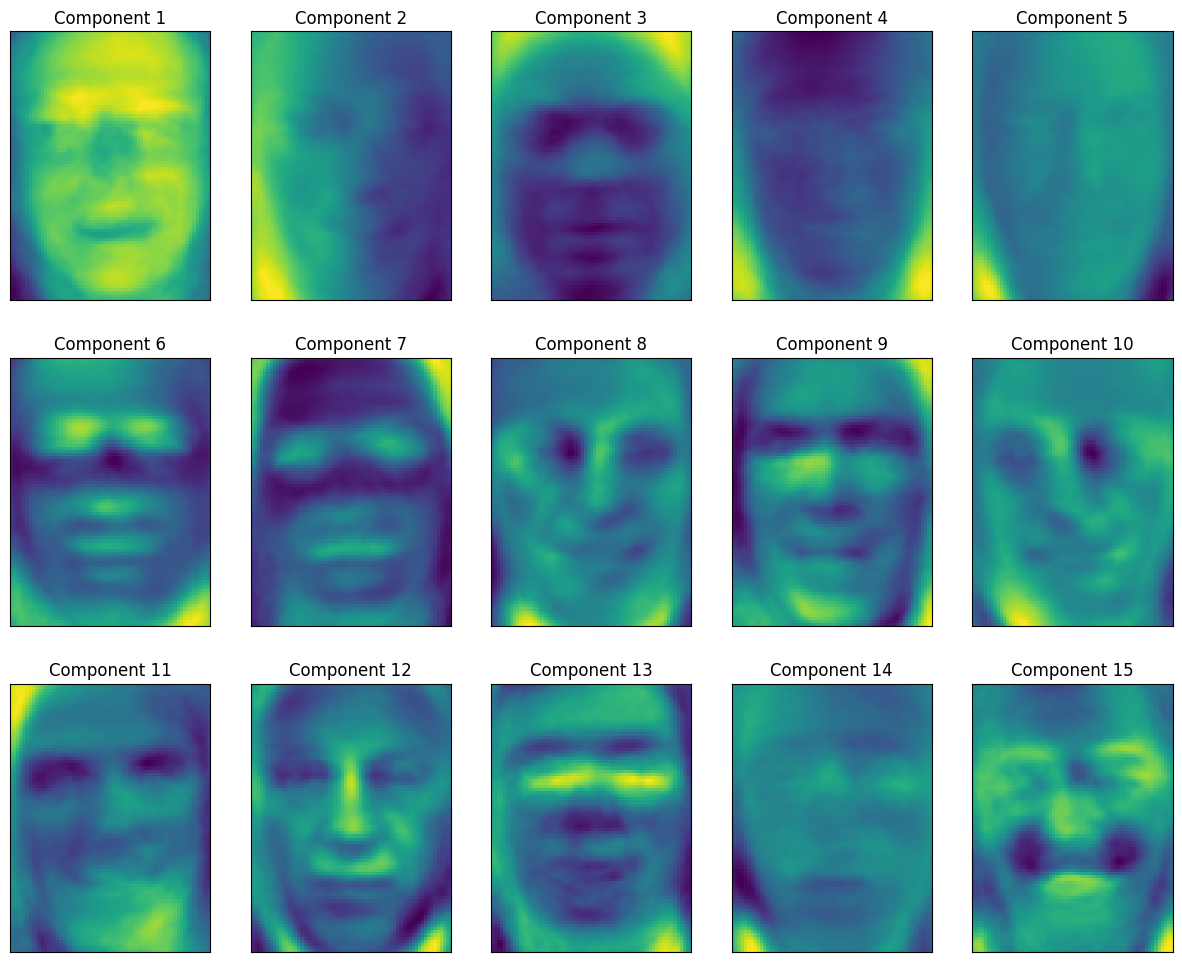

In [27]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f"Component {i+1}")

Możemy na podstawie ww. obrazu przynajmniej próbować domyślić się, które z aspektów obrazów twarzy zostały przechwycone przez niektóre z komponentów. Pierwsza składowa wskazuje na kontrast między twarzą a tłem, druga - różnice w oświetleniu lewej i prawej połowy twarzy itp. Reprezentacja ta nadal jest jednak odległa od postrzegania twarzy przez człowieka. Model PCA opiera się na pikselach, więc wyrównanie i oświetlenie twarzy mają duży wpływ na podobieństwo dwóch obrazów w pikselowej reprezentacji, ale nie są tym, na co człowiek zwróciłby uwagę w pierwszej kolejności.

Transformacja PCA w wersji z parametrem whiten polega na obróceniu danych i następnie porzuceniu komponentów o niskiej wariancji. Inną przydatną interpretacją jest próba znalezienia nowych wartości cech po rotacji PCA, aby wyrazić punkty testowe jako sumę ważoną głównych składowych.

Innym sposobem na zrozumienie PCA jest przyjrzenie się rekonstrukcji danych przy użyciu tylko niektórych komponentów. Możemy wykonać transformację polegającą na redukcji danych do niektórych głównych składowych i obróceniu w powrotem do pierwotnej przestrzeni.

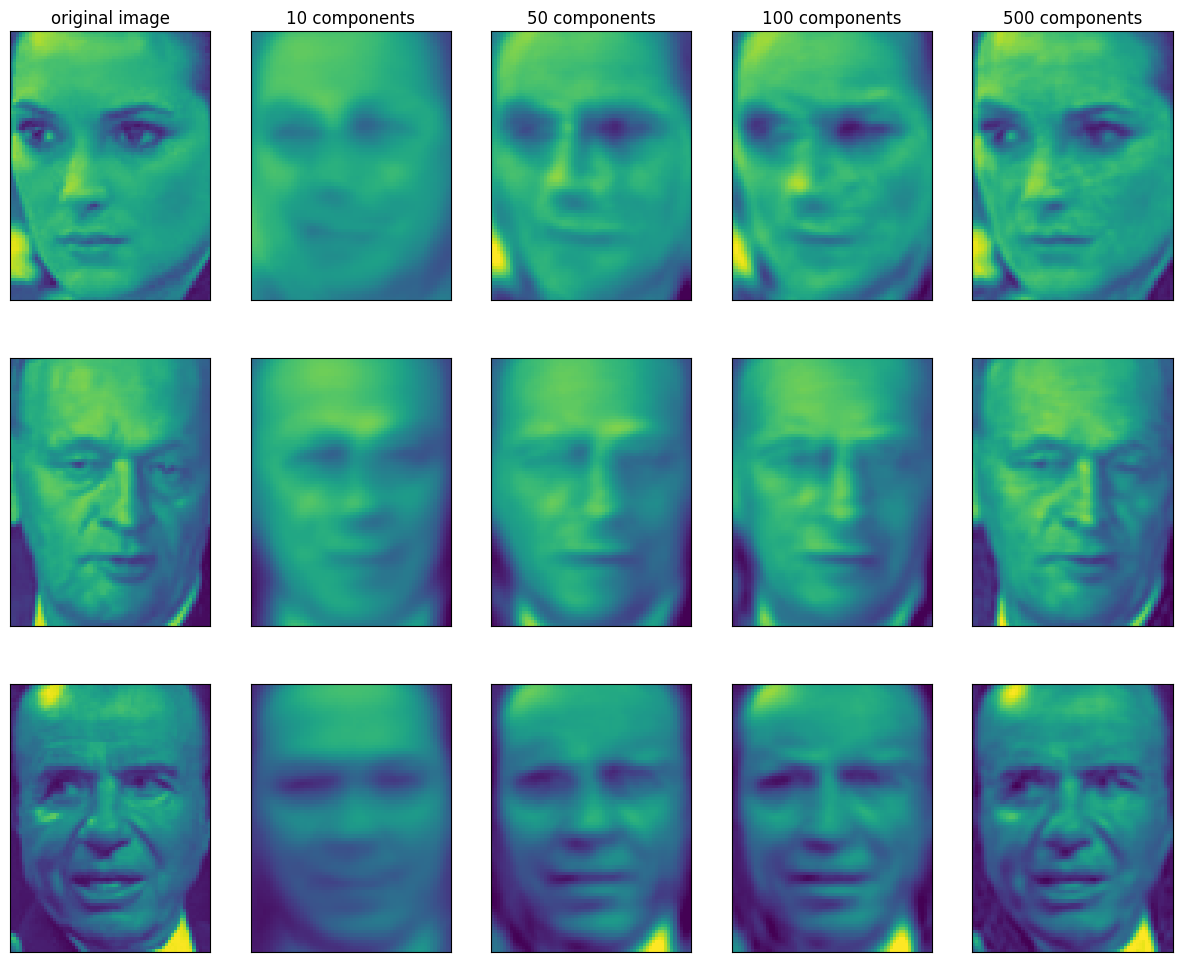

In [28]:
mglearn.plots.plot_pca_faces(people.data, people.data, image_shape)

Widać, że kiedy używamy pierwszych 10 głównych komponentów, tylko istota obrazu, (orientacja twarzy, oświetlenie) jest uchwycona. Im więcej składowych używamy, tym więcej szczegółów obrazu zostaje zachowanych. Użycie tylu składowych, ile jest pikseli, sprawiłoby, że nie odrzucilibyśmy żadnych informacji o obrocie i zrekonstruowalibyśmy obraz idealnie.

Spróbujmy również zastosować PCA do wizualizacji wszystkich twarzy ze zbioru danych na wykresie punktowym, używając tylko dwóch pierwszych głównych składowych oraz wskazując klasy przypisane do tego, kto jest na obrazku.



Text(0, 0.5, 'Second principal component')

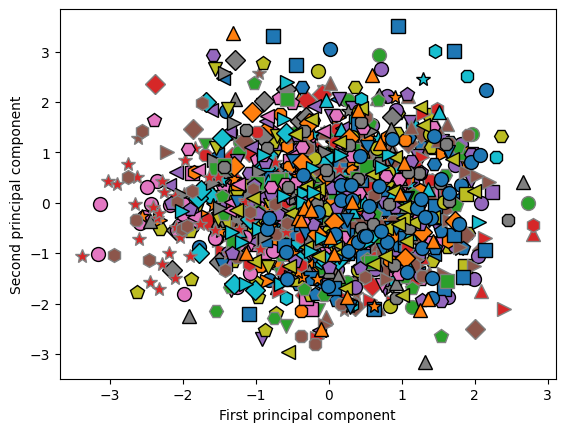

In [29]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Gdy używamy tylko dwóch pierwszych głównych komponentów, dane są właściwie zlane w jeden wielki blob, bez widocznego podziału klas. To nie zaskakuje, gdy mamy w pamięci, że nawet przy 10 głównych składowych charakterystyka twarzy jest bardzo ogólna.

## Nieujemna faktoryzacja macierzy (NMF).

Jest to kolejna technika używana do redukcji wymiarów. Działa podobnie do PCA, gdyż stara się zapisać każdy punkt danych jako ważoną sumę różnych składników. Jednak różnica polega na tym, że o ile w PCA chcieliśmy uzyskać elementy ortogonalne, wyjaśniające jak najwięcej wariancji w danych, o tyle celem zastosowania NMF jest to, aby wszystkie komponenty i współczynniki były nieujemne. Metodę tę możemy stosować tylko do danych, w których każda cecha jest nieujemna, bowiem nieujemna suma nieujemnych składników nie może stać się ujemna.

NMF stosowana jest częściej w przypadku danych tworzonych jako dodanie lub nałożenie kilku niezależnych źródeł, jak ścieżka dźwiękowa złożona z rozmów kilku osób lub gry kilku instrumentów. Jego użycie prowadzi do utworzenia łatwiej interpretowalnych komponentów od PCA - ujemne współczynniki i komponenty mogą prowadzić do trudniejszych do interpretacji efektów niwelowania.

Na wstępie korzystania z NMF musimy się upewnić, że dane są pozytywne, aby NMF mógł na nich operować. Dla NMF znaczenie ma miejsce, w którym znajdują się dane w stosunku do punktu (0, 0). Nieujemne składniki wyodrębniane w procesie uznać możemy za kierunki od (0, 0) w stronę danych.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


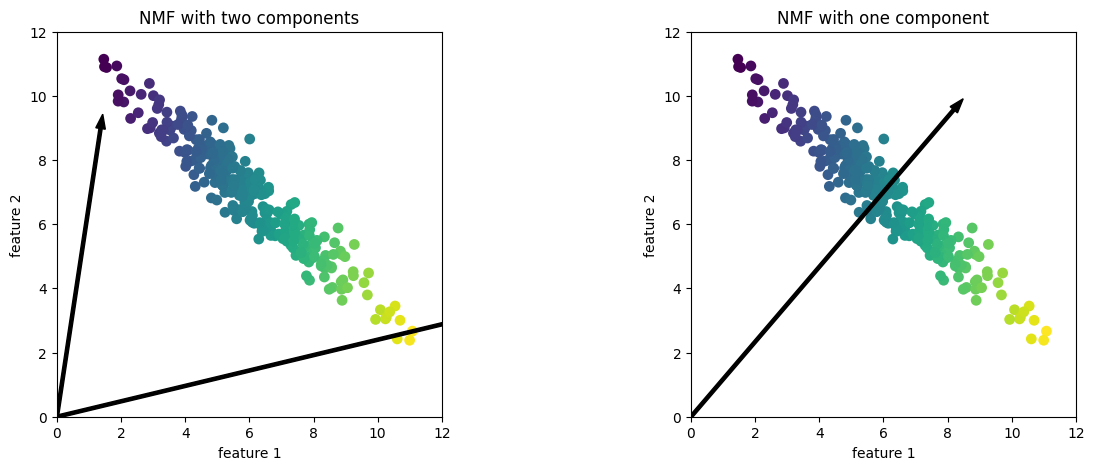

In [30]:
mglearn.plots.plot_nmf_illustration()

Z wykresu z lewej strony wynika, że NMF z dwoma składnikami można zapisać jako dodatnią kombinację dwóch komponentów. Jeżeli liczba komponentów jest na tyle duża, by odtworzyć idealnie dane (a więc jest ich tyle, ile cech), algorytm wybierze kierunki wskazujące na skrajności w danych. Jeżeli zaś używamy tylko jednego komponentu, NMF tworzy składnik wskazujący na średnią - to wskazanie na nią najlepiej wyjaśnia dane. Zmniejszając liczbę komponentów, nie tylko usuwa część kierunków, ale i tworzy nowy zestaw składników. Komponenty te nie są uporządkowane w żaden konkretny sposób; nie ma "pierwszej nieujemnej" składowej, wszystkie komponenty odgrywają taką samą rolę.

NMF używa inicjalizacji losowej - w zależności od ziarna może prowadzić do różnych wyników. Dla danych syntetycznych z dwiema losowymi, jak pokazane wyżej, nie ma to dużego wpływu, ale w bardziej złożonych sytuacjach mogą wystąpić bardziej drastyczne zmiany.

Zastosujmy NMF do zbioru danych twarzy, który wcześniej wykorzystaliśmy. Głównym parametrem NMF jest to, ile składowych chcemy wyodrębnić - zwykle jest to mniej niż liczba cech wejściowych. NMF

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


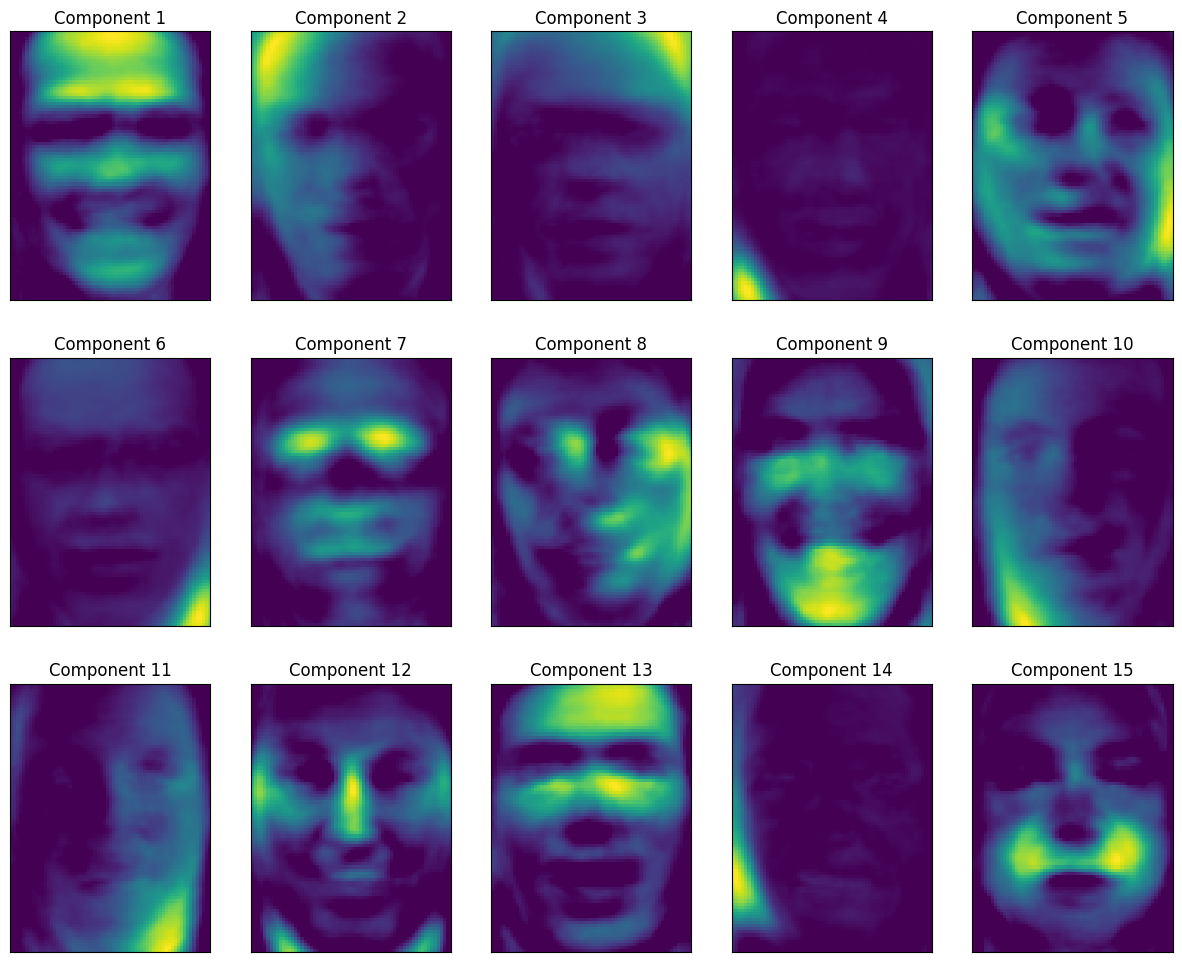

In [31]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f"Component {i+1}")

Wszystkie komponenty mają wartości pozytywne, przypominają więc prototypy twarzy bardziej niż komponenty wskazane przez PCA. Spójrzmy na obrazy, dla których np. komponent 5. i 7. są szczególnie mocne.

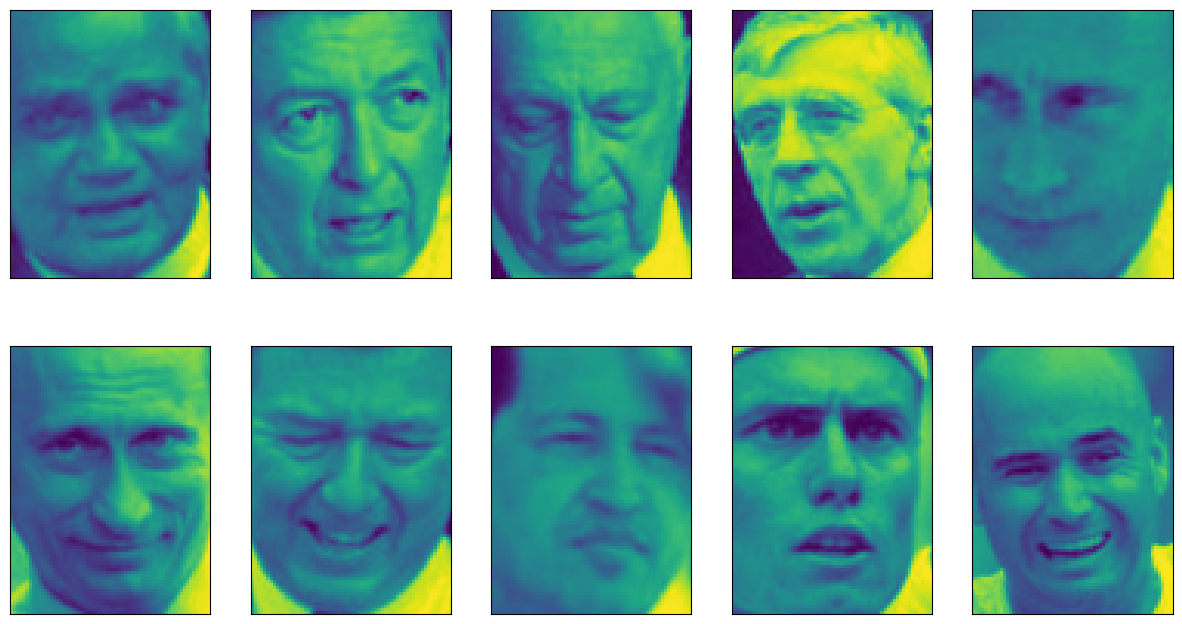

In [32]:
compn = 5
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

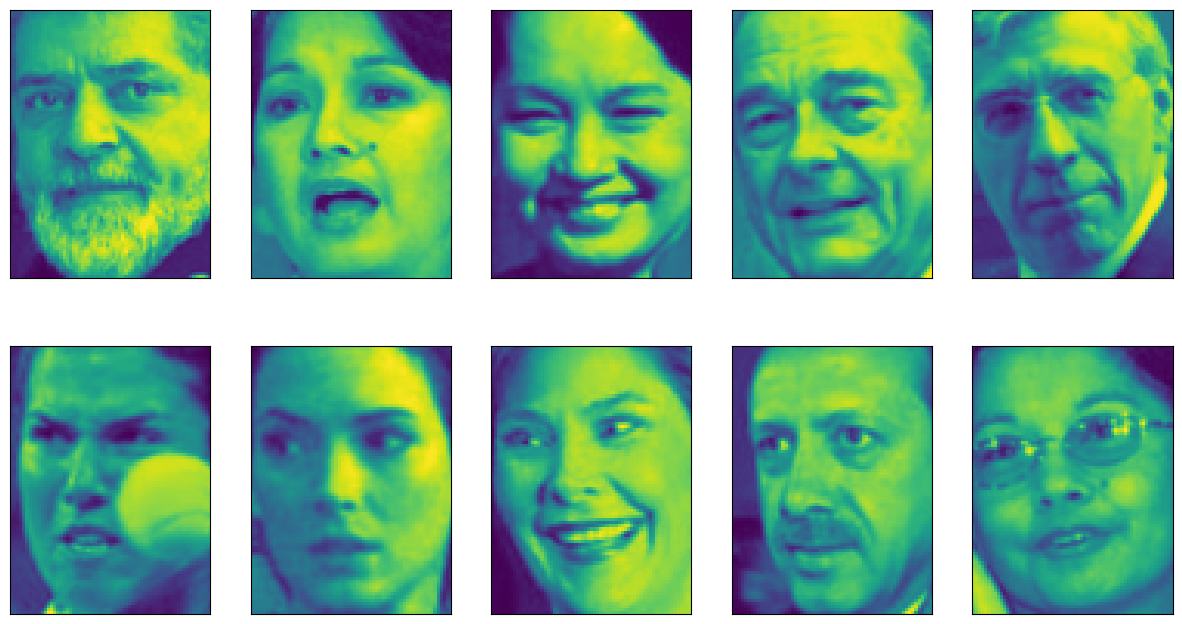

In [33]:
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Zgodnie z oczekiwaniami twarze, dla których współczynnik 5. ma wysoką wartość, obrócone są w prawo względem kadru, podczas gdy twarze z wysokim współczynnikiem 7. są skierowane w lewo. Wyodrębnianie takich wzorców działa najlepiej w przypadku danych o addytywnej, splotowej strukturze.

Przeanalizujmy przykład dot. danych syntetycznych. Przypuśćmy, że interesuje nas sygnał będący połączeniem trzech różnych źródeł.

Text(0, 0.5, 'Signal')

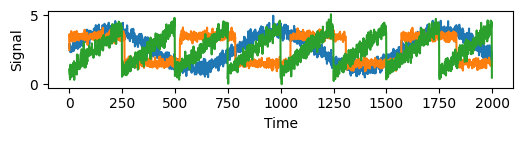

In [34]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

Nie możemy zaobserwować oryginalnych sygnałów, jedynie mieszaninę wszystkich trzech. Chcemy odzyskać dekompozycję zmiksowanego sygnału na składowe oryginalne, zakładamy więc, że mamy wiele różnych sposobów obserwacji - np. 100 urządzeń pomiarowych - dostarczających nam serię pomiarów.

In [35]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print(f"X.shape: {X.shape}")

X.shape: (2000, 100)


Do odzyskania trzech sygnałów możemy użyć NMF i porównać z odzyskanym przez PCA.

In [36]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print(f"Reconstructed signals (NMF): {S_.shape}")

pca = PCA(n_components=3)
H = pca.fit_transform(X)
print(f"Reconstructed signals (PCA): {H.shape}")

Reconstructed signals (NMF): (2000, 3)
Reconstructed signals (PCA): (2000, 3)


Poniżej aktywność odkryta przez obydwa algorytmy.

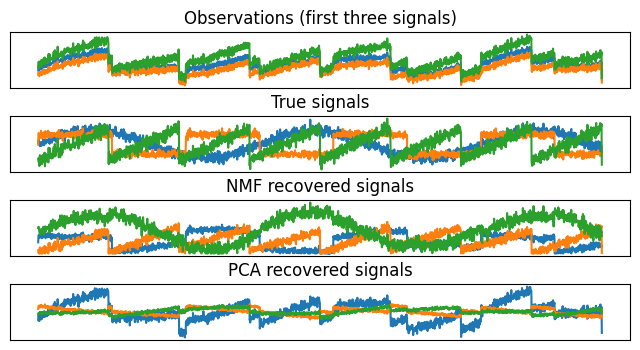

In [37]:
models = [X, S, S_, H]
names = ['Observations (first three signals)',
         'True signals',
         'NMF recovered signals',
         'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

NMF lepiej poradził sobie z odkryciem oryginalnych źródeł, PCA użył pierwszego komponentu do wyjaśnienia większości zmienności danych. Pamiętać trzeba, że komponenty produkowane przez NMF nie mają naturalnego uporządkowania.

Inne metody dekompozycji danych na ważoną sumę składników zawarte są w bibliotece Scikit-learn. Są wśród nich ICA (Independent Component Analysis - niezależna analiza składowych), FA (Factor Analysis - analiza czynników), kodowanie rzadkie.